### 1. Load the training and testing dataset provided with this lab and join the Kaggle competition. (1 point) https://www.kaggle.com/t/cdd98e14cf1c471ea95e47da59afdd06
<br>**Data Description**: The dataset contains information about people’s jobs such as their
demographic information etc. and the target variable is to predict whether the person is
looking for a job change or not, the dataset is imbalanced. There are 14,368 rows in the
training set and 4790 rows in the testing set. The columns in the dataset are as follows:<br>
**index**: Unique ID for candidate<br>
**city**: City code<br>
**city_ development _index**: Development index of the city (scaled)<br>
**gender**: Gender of candidate<br>
**relevent_experience**: Relevant experience of candidate<br>
**enrolled_university**: Type of University course enrolled if any<br>
**education_level**: Education level of candidate<br>
**major_discipline**: Education major discipline of candidate<br>
**experience**: Candidate total experience in years<br>
**company_size**: No of employees in current employer's company<br>
**company_type**: Type of current employer<br>
**lastnewjob**: Difference in years between previous job and current job<br>
**training_hours**: training hours completed<br>
**target**: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
# libraries used in this notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import copy
from numpy import log,dot,exp,shape
import numpy as np

In [2]:
# loading the dataset
x_train = pd.read_csv("../input/cmpe-257-lab-1-spring-2022/x_train.csv")
x_test = pd.read_csv("../input/cmpe-257-lab-1-spring-2022/x_test.csv")
y_train = pd.read_csv("../input/cmpe-257-lab-1-spring-2022/y_train.csv")

### 2. Explain in your own words what is NOIR classification of data. (2 points)

In [3]:
'''
NOIR Classification of data:
There are different type to represent the data. NOIR is basically the mnemonic to remember the different
type of scales to represent the data.
N stands for NOMINAL: It's a labeled data without any quantitative information.
                      Example.,country, race
O stands for ORDINAL: Data with order importance. Does not give any insight of the differentness between each class.
                      Example.,military ranks, income(low,medium,high), education level
I stands for INTERVAL: Data spread on integer scale and the difference between values with a meaningful interpretation.
                       It does not hold any true zero meaning it can be represent with the values below zero.
                       Example.,Temperature(celsius, Fahrenheit), Credit Score
R stands for RATIO: Data on a numeric scale with equal distance between each values and hold true zero value
                    Example., Temperature in Kelvin, Height, Speed
'''

"\nNOIR Classification of data:\nThere are different type to represent the data. NOIR is basically the mnemonic to remember the different\ntype of scales to represent the data.\nN stands for NOMINAL: It's a labeled data without any quantitative information.\n                      Example.,country, race\nO stands for ORDINAL: Data with order importance. Does not give any insight of the differentness between each class.\n                      Example.,military ranks, income(low,medium,high), education level\nI stands for INTERVAL: Data spread on integer scale and the difference between values with a meaningful interpretation.\n                       It does not hold any true zero meaning it can be represent with the values below zero.\n                       Example.,Temperature(celsius, Fahrenheit), Credit Score\nR stands for RATIO: Data on a numeric scale with equal distance between each values and hold true zero value\n                    Example., Temperature in Kelvin, Height, Speed

### 3. Classify the given dataset features into NOIR categories. (2 points)

In [4]:
'''
Nominal : index,city,gender,enrolled_university,major_discipline,company_type,target
Ordinal : relevent_experience,education_level,experience,last_new_job
Interval : company_size
Ratio : city_development_index
O/R ? : training_hours


index:N
city:N
city_development_index:R
gender:N
relevent_experience:O
enrolled_university:N
education_level:O
major_discipline:N
experience:O
company_size:I
company_type:N
last_new_job:O
training_hours:O/R?
target:N
'''

'\nNominal : index,city,gender,enrolled_university,major_discipline,company_type,target\nOrdinal : relevent_experience,education_level,experience,last_new_job\nInterval : company_size\nRatio : city_development_index\nO/R ? : training_hours\n\n\nindex:N\ncity:N\ncity_development_index:R\ngender:N\nrelevent_experience:O\nenrolled_university:N\neducation_level:O\nmajor_discipline:N\nexperience:O\ncompany_size:I\ncompany_type:N\nlast_new_job:O\ntraining_hours:O/R?\ntarget:N\n'

### 4. Summarize the dataset: (10 points)
a. Number of columns and rows present (1 point)<br>
b. Min, max, avg, std dev etc. stats for continuous features (hint: use pandas describe
function) (1 point)<br>
c. Number of unique values for categorical features (1 point)<br>
d. Number of nulls and Nans in each column (1 point)<br>
e. Visualize distribution of each feature using graphs (6 points)

In [5]:
merged_data = pd.merge(x_train,y_train[['index','target']],on='index', how='left')
merged_data.drop(['index'] , axis = 1, inplace = True)

In [6]:
def summarize_data(df,df_name):
    print(f'There are {df.shape[1]} columns and {df.shape[0]} rows in {df_name}')
    print("-"*100)
    print("Min, max, avg, std dev etc. stats for continuous features...\n",df.describe())
    print("-"*100)
    df_cat = df.select_dtypes(exclude = ['int64' , 'float64'])
    for col in df_cat.columns:
        print(f'{col} variable...')
        print(f'Number of Unique values:{len(df[col].unique())}')
        print(f'Unique values...\n{df[col].unique()}')
        print("\n")
    print("-"*100)
    print("Missing records in data...\n")
    missing_df = pd.DataFrame({"Null Values" : df.isna().sum() , "Percentage of Missing Values" : (df.isna().mean())*100}).loc[df.isna().sum().ne(0)]
    display(missing_df)

In [7]:
summarize_data(x_test,"Test Data")

There are 13 columns and 4790 rows in Test Data
----------------------------------------------------------------------------------------------------
Min, max, avg, std dev etc. stats for continuous features...
               index  city_development_index  training_hours
count   4790.000000             4790.000000     4790.000000
mean    9411.327975                0.830635       65.277662
std     5551.189470                0.123185       59.402501
min        1.000000                0.448000        1.000000
25%     4597.750000                0.743000       23.000000
50%     9270.000000                0.910000       47.000000
75%    14239.250000                0.920000       89.000000
max    19155.000000                0.949000      336.000000
----------------------------------------------------------------------------------------------------
city variable...
Number of Unique values:109
Unique values...
['city_104' 'city_114' 'city_83' 'city_103' 'city_73' 'city_28' 'city_21'
 'city_16' '

,Null Values,Percentage of Missing Values
gender,1115,23.277662
enrolled_university,94,1.962422
education_level,122,2.546973
major_discipline,724,15.114823
experience,20,0.417537
company_size,1508,31.482255
company_type,1542,32.192067
last_new_job,96,2.004175


In [8]:
summarize_data(merged_data,"Training data")

There are 13 columns and 14368 rows in Training data
----------------------------------------------------------------------------------------------------
Min, max, avg, std dev etc. stats for continuous features...
        city_development_index  training_hours        target
count            14368.000000    14368.000000  14368.000000
mean                 0.828252       65.396645      0.247982
std                  0.123419       60.277583      0.431856
min                  0.448000        1.000000      0.000000
25%                  0.738000       23.000000      0.000000
50%                  0.899000       47.000000      0.000000
75%                  0.920000       88.000000      0.000000
max                  0.949000      336.000000      1.000000
----------------------------------------------------------------------------------------------------
city variable...
Number of Unique values:123
Unique values...
['city_61' 'city_94' 'city_114' 'city_16' 'city_98' 'city_11' 'city_160'
 'city_2

,Null Values,Percentage of Missing Values
gender,3393,23.614978
enrolled_university,292,2.032294
education_level,338,2.352450
major_discipline,2089,14.539254
experience,45,0.313196
company_size,4430,30.832405
company_type,4598,32.001670
last_new_job,327,2.275891


In [9]:
def plot_distribution(df):
    df_num = merged_data.select_dtypes(exclude = ['object'])
    df_cat = merged_data.select_dtypes(exclude = ['int64' , 'float64'])
    for col in df_num.columns:
        fig = plt.figure(figsize=(14,7))
        sns.displot(merged_data,x = col)
        plt.show()
        
    for col in df_cat.columns:
        fig = plt.figure(figsize=(14,7))
        sns.countplot(x = col , data = merged_data)
        fig.autofmt_xdate()
        plt.show()

<Figure size 1008x504 with 0 Axes>

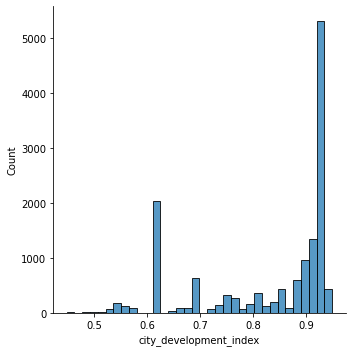

<Figure size 1008x504 with 0 Axes>

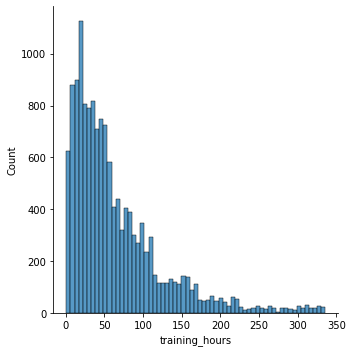

<Figure size 1008x504 with 0 Axes>

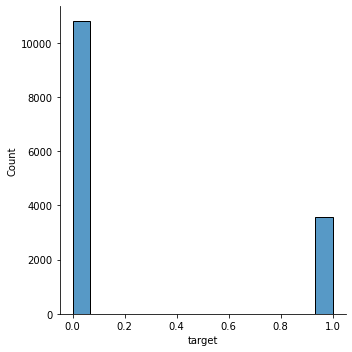

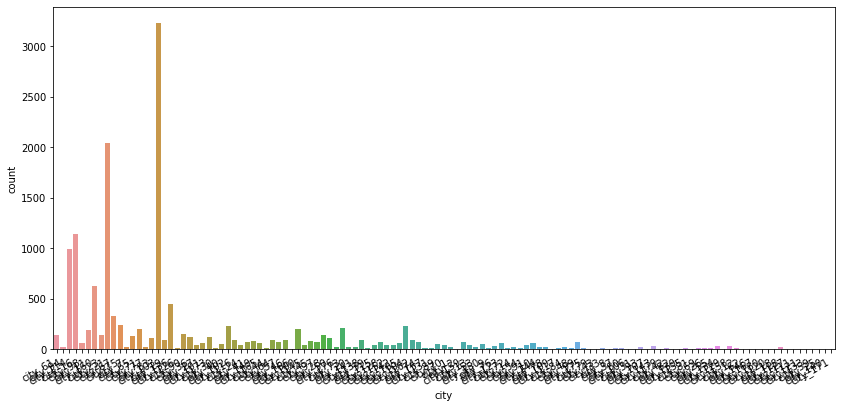

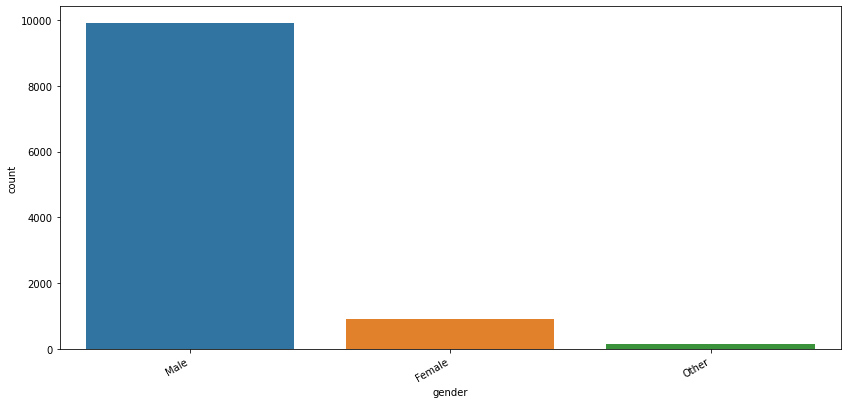

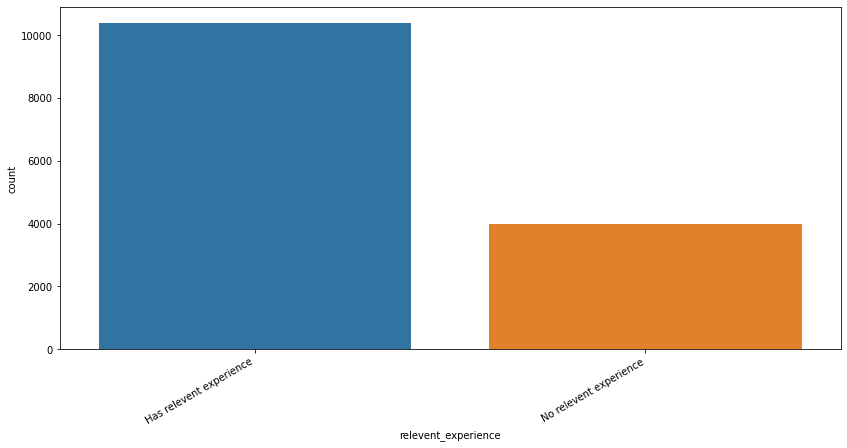

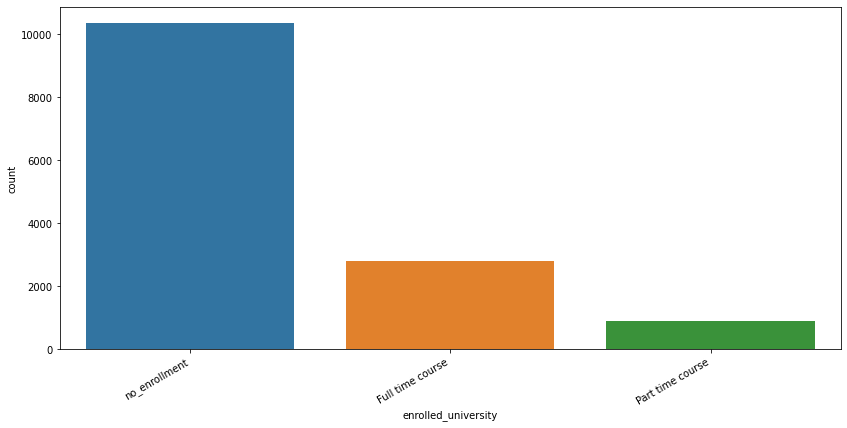

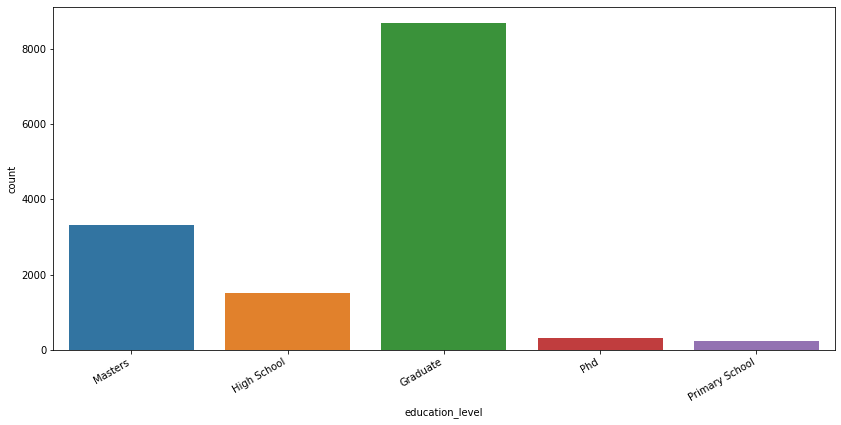

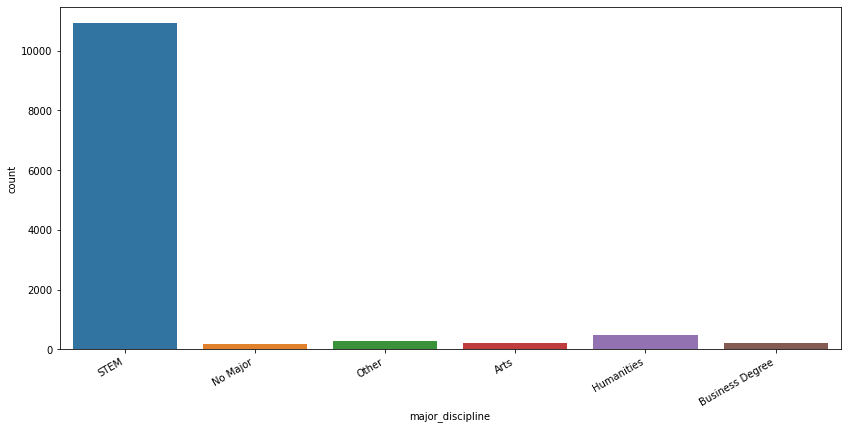

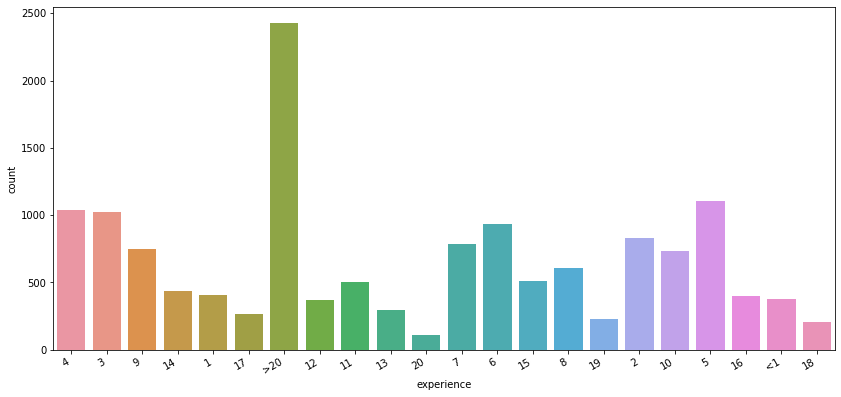

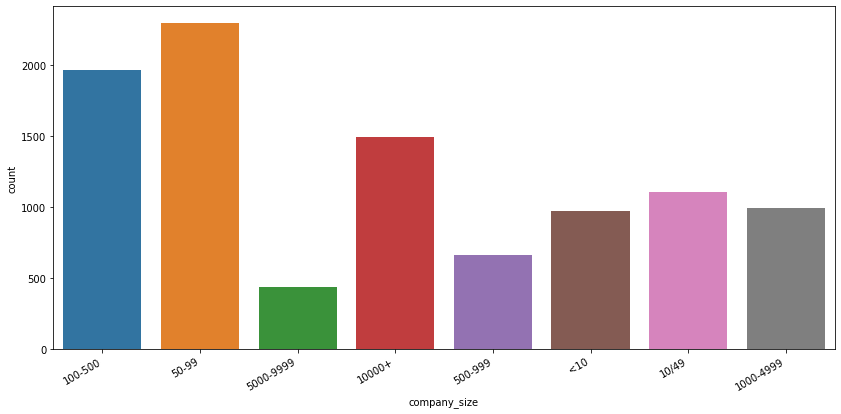

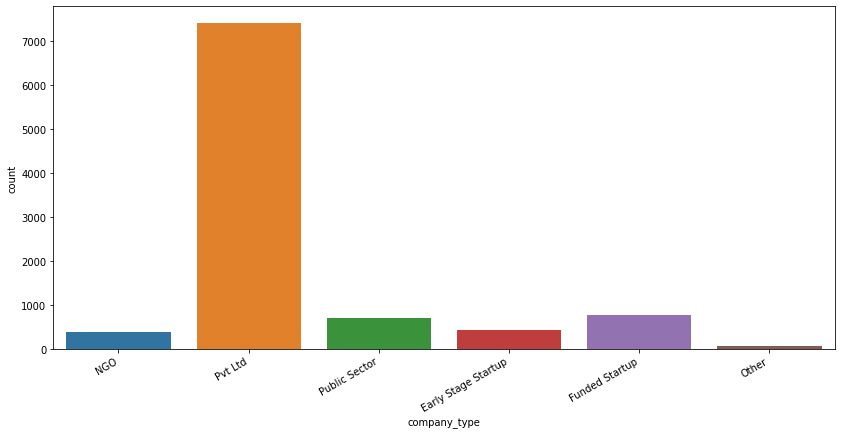

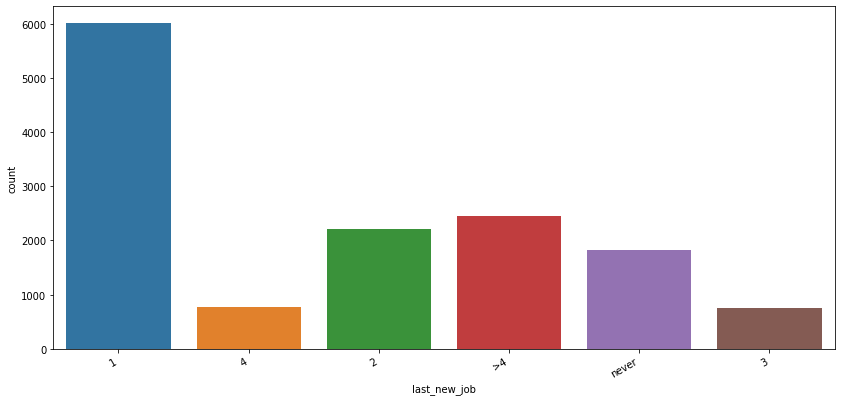

In [10]:
plot_distribution(merged_data)

### 5. Visualize the relationship of each feature with target variable (hint: create density plots for continuous features and cross tables for categorical features) (6 points)

In [11]:
def plot_relation(df):
    df_num = merged_data.select_dtypes(exclude = ['object'])
    df_cat = merged_data.select_dtypes(exclude = ['int64' , 'float64'])
    for col in df_num.columns:
        fig = plt.figure(figsize=(14,7))
        sns.displot(df , x = col , hue = "target" , stat = "density" , element = "step")
        plt.show()
        
    for col in df_cat.columns:
        fig = plt.figure(figsize=(14,7))
        # Creating crosstab
        crosstb = pd.crosstab(df_cat[col], df.target)
        # Creating barplot
        barplot = crosstb.plot.bar(rot=0)
        fig.autofmt_xdate()
        plt.show()

<Figure size 1008x504 with 0 Axes>

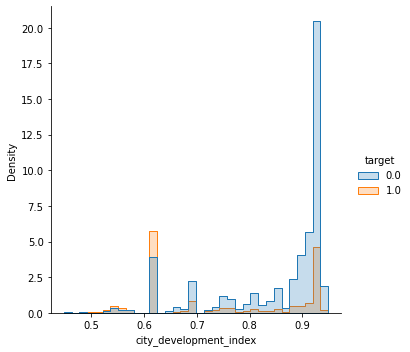

<Figure size 1008x504 with 0 Axes>

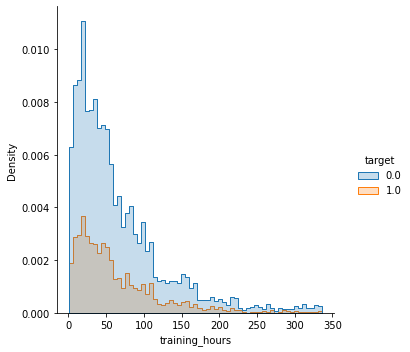

<Figure size 1008x504 with 0 Axes>

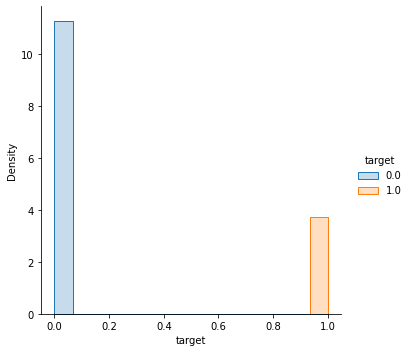

<Figure size 1008x504 with 0 Axes>

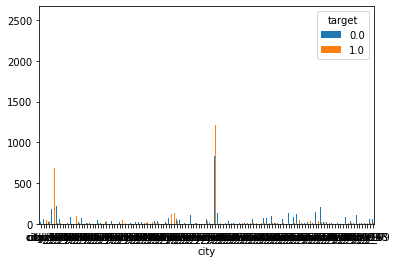

<Figure size 1008x504 with 0 Axes>

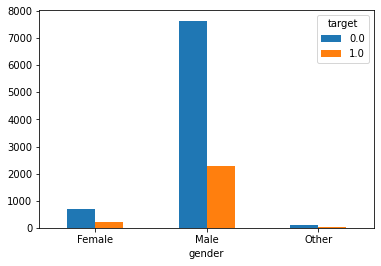

<Figure size 1008x504 with 0 Axes>

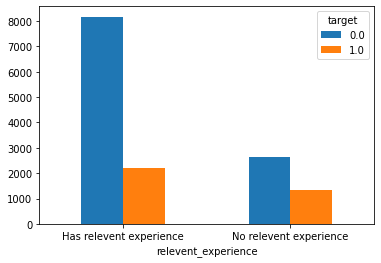

<Figure size 1008x504 with 0 Axes>

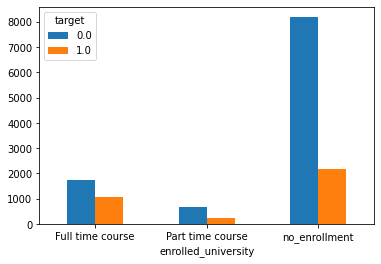

<Figure size 1008x504 with 0 Axes>

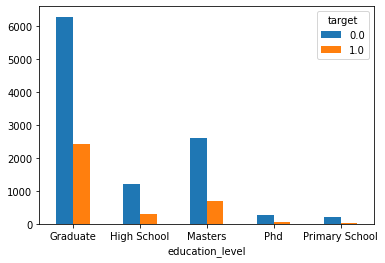

<Figure size 1008x504 with 0 Axes>

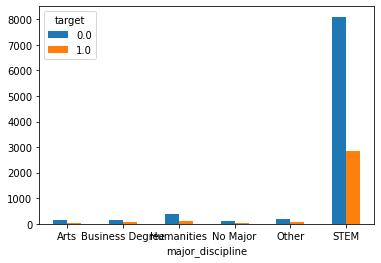

<Figure size 1008x504 with 0 Axes>

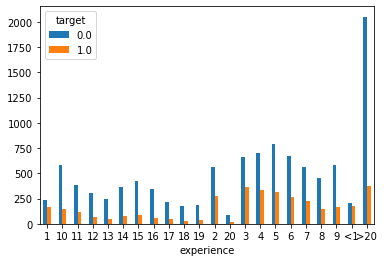

<Figure size 1008x504 with 0 Axes>

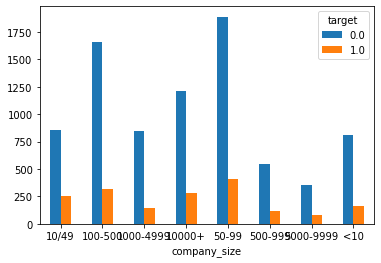

<Figure size 1008x504 with 0 Axes>

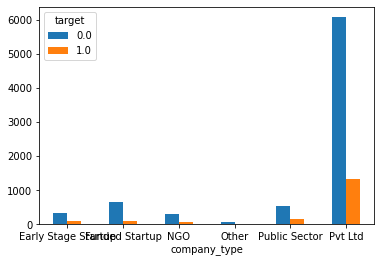

<Figure size 1008x504 with 0 Axes>

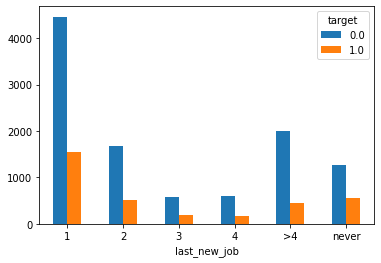

In [12]:
plot_relation(merged_data)

### 6. Handle missing values: Use any three methods to handle missing values. (6 points)

In [13]:
missing_df = pd.DataFrame({"Null Values" : merged_data.isna().sum() , "Percentage of Missing Values" : (merged_data.isna().mean())*100}).loc[merged_data.isna().sum().ne(0)]
display(missing_df)

,Null Values,Percentage of Missing Values
gender,3393,23.614978
enrolled_university,292,2.032294
education_level,338,2.352450
major_discipline,2089,14.539254
experience,45,0.313196
company_size,4430,30.832405
company_type,4598,32.001670
last_new_job,327,2.275891


In [14]:
# experience, replacing >20 with 21 and <1 with 0.5
# train data
merged_data['experience'] = merged_data['experience'].str.replace(">20","21")
merged_data['experience'] = merged_data['experience'].str.replace("<1","0.5")
merged_data['experience'] = merged_data['experience'].apply(pd.to_numeric)

# test data
x_test['experience'] = x_test['experience'].str.replace(">20","21")
x_test['experience'] = x_test['experience'].str.replace("<1","0.5")
x_test['experience'] = x_test['experience'].apply(pd.to_numeric)

In [15]:
# last_new_job, replacing >4 with 5 and never with 0
# train data
merged_data['last_new_job'] = merged_data['last_new_job'].str.replace(">4","5")
merged_data['last_new_job'] = merged_data['last_new_job'].str.replace("never","0")
merged_data['last_new_job'] = merged_data['last_new_job'].apply(pd.to_numeric)

# test data
# last_new_job
x_test['last_new_job'] = x_test['last_new_job'].str.replace(">4","5")
x_test['last_new_job'] = x_test['last_new_job'].str.replace("never","0")
x_test['last_new_job'] = x_test['last_new_job'].apply(pd.to_numeric)

In [16]:
# handling gender value nulls, filling null values with 'Hidden'
merged_data['gender'].fillna('Hidden',inplace = True)
x_test['gender'].fillna('Hidden' , inplace = True)

In [17]:
# handling enrolled_university ->filling with mode
merged_data['enrolled_university'].fillna('no_enrollment' , inplace = True)
x_test['enrolled_university'].fillna('no_enrollment' , inplace = True)

In [18]:
# education_level null handle ->filling with mode
merged_data['education_level'].fillna('Graduate' , inplace = True)
x_test['education_level'].fillna('Graduate' , inplace = True)

In [19]:
# major_discipline ->filling with mode
merged_data['major_discipline'].fillna('STEM' , inplace = True)
x_test['major_discipline'].fillna('STEM' , inplace = True)

In [20]:
# experience ->filling with mode
merged_data['experience'].fillna(21.0,inplace = True)
x_test['experience'].fillna(21.0,inplace = True)

In [21]:
# company size, converting the range in fix number : upper - lower
merged_data['company_size'] = merged_data['company_size'].str.replace("<10","10-1")
merged_data['company_size'] = merged_data['company_size'].str.replace("/","-")
merged_data['company_size'] = merged_data['company_size'].str.replace("10000+","10001-1")
merged_data['company_size'] = merged_data['company_size'].str.replace("<10","10-1")
merged_data['company_size'] = merged_data['company_size'].str.replace("+","")

new = merged_data["company_size"].str.split("-", n = 1, expand = True)
new["x"]= new[0]
new["y"]= new[1]
new['x'] = new['x'].apply(pd.to_numeric)
new['y'] = new['y'].apply(pd.to_numeric)
merged_data['company_size'] = abs(new['x'] - new['y'])

# test data
# test data company_size
x_test['company_size'] = x_test['company_size'].str.replace("<10","10-1")
x_test['company_size'] = x_test['company_size'].str.replace("/","-")
x_test['company_size'] = x_test['company_size'].str.replace("10000+","10001-1")
x_test['company_size'] = x_test['company_size'].str.replace("<10","10-1")
x_test['company_size'] = x_test['company_size'].str.replace("+","")

new = x_test["company_size"].str.split("-", n = 1, expand = True)
new["x"]= new[0]
new["y"]= new[1]
new['x'] = new['x'].apply(pd.to_numeric)
new['y'] = new['y'].apply(pd.to_numeric)
x_test['company_size'] = abs(new['x'] - new['y'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [22]:
# company_size ->filling with mode
merged_data['company_size'].fillna(int(merged_data['company_size'].mean()) , inplace= True)
x_test['company_size'].fillna(int(x_test['company_size'].mean()) , inplace= True)

In [23]:
# company_type ->filling with mode
merged_data['company_type'].fillna('Pvt Ltd' , inplace = True)
x_test['company_type'].fillna('Pvt Ltd' , inplace = True)

In [24]:
# last_new_job ->filling with mode
merged_data['last_new_job'].fillna(2.0,inplace = True)
x_test['last_new_job'].fillna(2.0,inplace = True)

In [25]:
missing_df = pd.DataFrame({"Null Values" : merged_data.isna().sum() , "Percentage of Missing Values" : (merged_data.isna().mean())*100}).loc[merged_data.isna().sum().ne(0)]
display(missing_df)

,Null Values,Percentage of Missing Values


In [26]:
merged_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4.0,400.0,NGO,1.0,22,0.0
1,city_94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,3.0,2250.0,Pvt Ltd,1.0,22,1.0
2,city_114,0.926,Hidden,Has relevent experience,Full time course,Masters,STEM,9.0,49.0,Pvt Ltd,1.0,88,0.0
3,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14.0,2250.0,Pvt Ltd,4.0,91,0.0
4,city_16,0.910,Hidden,Has relevent experience,no_enrollment,Graduate,STEM,1.0,4999.0,Pvt Ltd,1.0,92,0.0


### 7. Create new features using combinations / transformations of existing features (Optional)        (0 points)

In [27]:
'''
Handling "city" variable: replacing city_ with "" & changing the datatype to numeric
'''
merged_data['city'] = merged_data['city'].str.replace("city_","")
x_test['city'] = x_test['city'].str.replace("city_","")
merged_data['city'] = merged_data['city'].apply(pd.to_numeric)
x_test['city'] = x_test['city'].apply(pd.to_numeric)

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14368 entries, 0 to 14367
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    14368 non-null  int64  
 1   city_development_index  14368 non-null  float64
 2   gender                  14368 non-null  object 
 3   relevent_experience     14368 non-null  object 
 4   enrolled_university     14368 non-null  object 
 5   education_level         14368 non-null  object 
 6   major_discipline        14368 non-null  object 
 7   experience              14368 non-null  float64
 8   company_size            14368 non-null  float64
 9   company_type            14368 non-null  object 
 10  last_new_job            14368 non-null  float64
 11  training_hours          14368 non-null  int64  
 12  target                  14368 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 2.0+ MB


In [29]:
def transform_dummies(df):
    df.relevent_experience = df.relevent_experience.map({"Has relevent experience" : 1, "No relevent experience" : 0})
    df.education_level = df.education_level.replace({"Graduate":5, "Masters":4, "High School":3, "Phd":2,"Primary School":1})
    df.company_type = df.company_type.replace({"Pvt Ltd": 6,"Funded Startup": 5,"Public Sector": 4,"Early Stage Startup": 3,"NGO": 2,"Other": 1})
    return pd.get_dummies(df, columns=["gender", "enrolled_university" , "major_discipline"], prefix_sep='_',
               prefix=["gender","uni", "major"])

In [30]:
temp_df = transform_dummies(copy.deepcopy(merged_data))

In [31]:
temp_df.head()

,city,city_development_index,relevent_experience,education_level,experience,company_size,company_type,last_new_job,training_hours,target,...,gender_Other,uni_Full time course,uni_Part time course,uni_no_enrollment,major_Arts,major_Business Degree,major_Humanities,major_No Major,major_Other,major_STEM
0,61,0.913,1,4,4.0,400.0,2,1.0,22,0.0,...,0,0,0,1,0,0,0,0,0,1
1,94,0.698,1,3,3.0,2250.0,6,1.0,22,1.0,...,0,0,0,1,0,0,0,0,0,1
2,114,0.926,1,4,9.0,49.0,6,1.0,88,0.0,...,0,1,0,0,0,0,0,0,0,1
3,114,0.926,0,5,14.0,2250.0,6,4.0,91,0.0,...,0,1,0,0,0,0,0,0,0,1
4,16,0.910,1,5,1.0,4999.0,6,1.0,92,0.0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
merged_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4.0,400.0,NGO,1.0,22,0.0
1,94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,3.0,2250.0,Pvt Ltd,1.0,22,1.0
2,114,0.926,Hidden,Has relevent experience,Full time course,Masters,STEM,9.0,49.0,Pvt Ltd,1.0,88,0.0
3,114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14.0,2250.0,Pvt Ltd,4.0,91,0.0
4,16,0.910,Hidden,Has relevent experience,no_enrollment,Graduate,STEM,1.0,4999.0,Pvt Ltd,1.0,92,0.0


### 8. Scale the features for models that require scaling and perform required pre-processing(such as one hot encoding etc.) (5 points)

In [33]:
def scale_data(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    return scaler.transform(df)

In [34]:
temp_df = scale_data(copy.deepcopy(transform_dummies(copy.deepcopy(merged_data.drop(['target'] , axis = 1)))))

In [35]:
summarize_data(merged_data,"Training Data")

There are 13 columns and 14368 rows in Training Data
----------------------------------------------------------------------------------------------------
Min, max, avg, std dev etc. stats for continuous features...
                city  city_development_index    experience  company_size  \
count  14368.000000            14368.000000  14368.000000  14368.000000   
mean      80.124791                0.828252     10.122007   2250.671283   
std       46.501134                0.123419      6.739712   2964.874441   
min        1.000000                0.448000      0.500000      9.000000   
25%       21.000000                0.738000      4.000000     49.000000   
50%      100.000000                0.899000      9.000000   2250.000000   
75%      104.000000                0.920000     16.000000   2250.000000   
max      180.000000                0.949000     21.000000  10000.000000   

       last_new_job  training_hours        target  
count  14368.000000    14368.000000  14368.000000  
mean

,Null Values,Percentage of Missing Values


In [36]:
# move it up
x_test_index = x_test['index']
x_test.drop(['index'],axis = 1,inplace = True)

### 9. Explain the following terms in detail (9 points)
a. Pearson’s correlation (3 points)<br>
b. T – test (3 points)<br>
c. Chi squared test (3 points)

In [37]:
'''
a)Pearson's correlation:
Gives the linear relation between two variables. The value of Pearson's correlation varies between -1 to 1.
Here, -1 represents total negative correlation, 0 meaninf no relation at all and +1 being the total positive correlation.
Definition : The pearson's correlation between two variable is covariance of the two variables devided by the 
             product of their standard deviation .

b)T - test:
A correlation focuses on the relation between two variables while T-test gives the insight about how significant
the difference between two groups are.
In other words, it tells us whether the difference that occured between two variable was fluke or it was genuine.
Example: Suppose there's a drug company which developed a new cancer drug and they want to find out the 
         life expectancy. There a control group as well who were given a placebo. A group taking placebo
         give the life expectancy of +5 years while a group taking a new cancer drug gives +6 years of life 
         expectancy. Now there's a two possiblity that it may occured due to fluke or by chance or it might be
         a genuine that new drug works better than placebo. To check whether this results are representative for
         entire solution or not, we use T-test to do so.
         
c)Chi squared test:
The chi-square test is a hypothesis test designed to test for a statistically significant relationship
between nominal and ordinal variables organized in a bivariate table. In other words,
it tells us whether two variables are independent of one another or not.

the chi-square test begins with a handful of assumptions, a pair of hypotheses, a sampling distribution 
and an alpha level and ends with a conclusion obtained via comparison of an obtained statistic with a 
critical statistic.

Assumptions:Data must be randomly selected and the quetionation variables must be ordinal or nominal.
Pair of hypotheses: Null hypotheses and Research hypotheses.
                    Null hypotheses states that there is no relationship between two variables while
                    Research hypotheses states that there is relationship between two variables at hand.
                    
The test statistic follows a chi-square distribution, and the conclusion depends on whether or not our 
obtained statistic is greater that the critical statistic at our chosen alpha level.
'''

"\na)Pearson's correlation:\nGives the linear relation between two variables. The value of Pearson's correlation varies between -1 to 1.\nHere, -1 represents total negative correlation, 0 meaninf no relation at all and +1 being the total positive correlation.\nDefinition : The pearson's correlation between two variable is covariance of the two variables devided by the \n             product of their standard deviation .\n\nb)T - test:\nA correlation focuses on the relation between two variables while T-test gives the insight about how significant\nthe difference between two groups are.\nIn other words, it tells us whether the difference that occured between two variable was fluke or it was genuine.\nExample: Suppose there's a drug company which developed a new cancer drug and they want to find out the \n         life expectancy. There a control group as well who were given a placebo. A group taking placebo\n         give the life expectancy of +5 years while a group taking a new cancer

### 10. Perform Pearson correlation between continuous features and plot the heatmap of the correlation matrix. (3 points)

In [38]:
temp_df = pd.concat([x_train, y_train['target']], axis = 1)

                           index  city_development_index  training_hours  \
index                   1.000000                0.001561        0.006070   
city_development_index  0.001561                1.000000        0.002239   
training_hours          0.006070                0.002239        1.000000   
target                  0.005439               -0.345985       -0.021143   

                          target  
index                   0.005439  
city_development_index -0.345985  
training_hours         -0.021143  
target                  1.000000  


<AxesSubplot:>

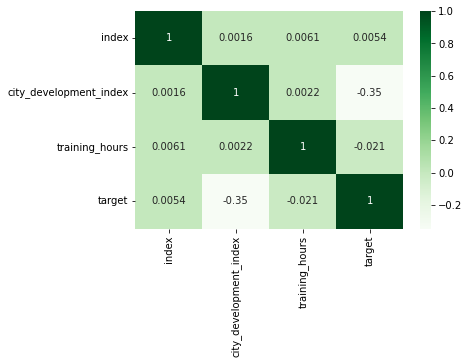

In [39]:
corr = temp_df.corr()
print(corr)
sns.heatmap(corr,annot = True, cmap = "Greens")

### 11. Perform t test on continuous features after dividing them using target variable. (3 points)

In [40]:
df_num = merged_data.select_dtypes(exclude = ['object'])
cols = df_num.columns
target_column = 'target'

In [41]:
from scipy.stats import ttest_ind
for col in cols:
    df_temp=df_num[[col,target_column]].copy()
    print("T-test on",col)
    df_zero_class = df_num[df_num[target_column]==0].copy()
    df_one_class = df_num[df_num[target_column]==1].copy()
    print(ttest_ind(df_zero_class[col], df_one_class[col]))
    print("-"*100)

T-test on city
Ttest_indResult(statistic=17.76283432392717, pvalue=7.645222509095862e-70)
----------------------------------------------------------------------------------------------------
T-test on city_development_index
Ttest_indResult(statistic=44.19885459032697, pvalue=0.0)
----------------------------------------------------------------------------------------------------
T-test on experience
Ttest_indResult(statistic=20.842941637342086, pvalue=4.485250551198275e-95)
----------------------------------------------------------------------------------------------------
T-test on company_size
Ttest_indResult(statistic=-0.31204904460212984, pvalue=0.7550077794062933)
----------------------------------------------------------------------------------------------------
T-test on last_new_job
Ttest_indResult(statistic=8.945009503061717, pvalue=4.1672763772588194e-19)
----------------------------------------------------------------------------------------------------
T-test on training_ho

### 12. Perform Chi squared test among categorical variables and with the target variable (3 points)

In [42]:
from scipy import stats

In [43]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
#     display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
#     print('---Observed (O)---')
#     display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
#     print('---Expected (E)---')
#     display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f

In [44]:
cols = merged_data.select_dtypes(exclude = ['int64' , 'float64']).columns
for col in cols:
    c,d = chi2_by_hand(merged_data,col,"target")

# if total is less than 0.05 then H0 accepted
# city : 122 ,0.05 -> 1.98 H0 : No
# gender : 2 -> 4.30 H0 : Yes
# relevent_experience : 1 -> 12.71 H0 : No
# enrolled_university : 2 -> 4.30 H0: No
# education_level : 4 -> 2.78 H0 : No
# major_discipline : 4 -> 2.57 H0 : No
# company_type : 5 -> 2.57 H0 : NO
# H0 is accepted, that is, the variables do not have a significant relation

---Chi-Square---


target,0.0,1.0,Total
gender,,,
Female,0.016277,0.049360,0.065636
Hidden,12.924432,39.194074,52.118505
Male,4.765391,14.451318,19.216709
Other,0.113790,0.345074,0.458864
Total,17.819889,54.039826,71.859714


---Chi-Square---


target,0.0,1.0,Total
relevent_experience,,,
Has relevent experience,16.529257,50.125912,66.655169
No relevent experience,43.097247,130.694851,173.792098
Total,59.626504,180.820763,240.447267


---Chi-Square---


target,0.0,1.0,Total
enrolled_university,,,
Full time course,66.253213,200.916633,267.169846
Part time course,0.068653,0.208193,0.276845
no_enrollment,18.110015,54.919650,73.029665
Total,84.431880,256.044476,340.476356


---Chi-Square---


target,0.0,1.0,Total
education_level,,,
Graduate,8.704466,26.396788,35.101254
High School,4.607422,13.972268,18.579690
Masters,5.410422,16.407411,21.817833
Phd,3.332867,10.107107,13.439974
Primary School,4.243504,12.868667,17.112171
Total,26.298680,79.752242,106.050922


---Chi-Square---


target,0.0,1.0,Total
major_discipline,,,
Arts,0.476187,1.444063,1.920249
Business Degree,0.372451,1.129479,1.501930
Humanities,0.548095,1.662128,2.210223
No Major,0.014031,0.042549,0.056580
Other,0.001452,0.004403,0.005855
STEM,0.016655,0.050507,0.067163
Total,1.428870,4.333129,5.761999


---Chi-Square---


target,0.0,1.0,Total
company_type,,,
Early Stage Startup,0.002319,0.007031,0.009350
Funded Startup,10.598625,32.140932,42.739557
NGO,1.888858,5.728068,7.616925
Other,0.088378,0.268011,0.356388
Public Sector,0.929723,2.819439,3.749162
Pvt Ltd,1.736855,5.267113,7.003968
Total,15.244757,46.230593,61.475351


### 13. Compare the features selected using visualization from question 5 and using the statistical tests from the previous three questions. (5 points)

In [45]:
'''
index column is not related with target variable as per pearson correlation coefficient.
As per chi2 test result, gender variable does not have significant relation with target variable
'''

'\nindex column is not related with target variable as per pearson correlation coefficient.\nAs per chi2 test result, gender variable does not have significant relation with target variable\n'

### 14. Explain the following terms: (6 points)
a. Forward Selection (2 points)<br>
b. Backward Elimination (2 points)<br>
c. Recursive feature elimination (2 points)

In [46]:
'''
a)Forward Selection: It is a variable selection method.
This process starts with the empty null model and starts to add the most significant features one by one
Until a pre-specified stopping rule is reached or until there's no more variable left.

How to determine which variable is most significant to add to model? 
This can be done by analyzing the model each time we add new varible to it
We can check for model's p-value or R^2 value increase or drop in model's RSS

b)Backward Elimination: It is a variable selection method but instead of adding new variables in the model
we start with the model which has all the variables and then one by one we remove the least significant variable 
from it. We repeat this process untill there's no more variable or if we reach any pre defined rule.

How to determine which variable is least significant? 
It is same as we did in Forward selection but instead of lowest P-value we check for the variable which has
the highest P-value or when removed which variable gives the least drop in R^2 or which gives the lowest 
increase in RSS

c)Recursive Feature Elimination:
This is as well the feature selection methos. It is easy to implement and most effective for feature selection
which is most relevant in predicting the target variable.

Process:
We starts with the all features in the model and then we compute an importance score for each predictor.
We will remove the feature which yields the least importance score and then will re-bilt the model and 
recompute the importance and repeat the process untill any predefined rule.
'''

"\na)Forward Selection: It is a variable selection method.\nThis process starts with the empty null model and starts to add the most significant features one by one\nUntil a pre-specified stopping rule is reached or until there's no more variable left.\n\nHow to determine which variable is most significant to add to model? \nThis can be done by analyzing the model each time we add new varible to it\nWe can check for model's p-value or R^2 value increase or drop in model's RSS\n\nb)Backward Elimination: It is a variable selection method but instead of adding new variables in the model\nwe start with the model which has all the variables and then one by one we remove the least significant variable \nfrom it. We repeat this process untill there's no more variable or if we reach any pre defined rule.\n\nHow to determine which variable is least significant? \nIt is same as we did in Forward selection but instead of lowest P-value we check for the variable which has\nthe highest P-value or w

### 16. Train at least 5 different classification models on the final data (Perform hyper parameter tuning using a validation set for each of the model). (10 points)

In [47]:
# linear svm - 1
from sklearn.model_selection import train_test_split,cross_validate,KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import numpy as np

In [48]:
x_scaled = scale_data(copy.deepcopy(transform_dummies(copy.deepcopy(merged_data.drop(['target'] , axis = 1)))))
X_train, X_test, y_train, y_test = train_test_split(x_scaled, merged_data['target'], test_size = 0.33 ,random_state = 42)

In [49]:
# parameter tuning
param_grid = {'C': [0.1,5], 'gamma': [1,0.01,0.05],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 5], 'gamma': [1, 0.01, 0.05],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [50]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("Accuracy After Hyperparameter tuning : ", accuracy_score(y_test,grid_predictions))

[[3252  305]
 [ 733  452]]
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      3557
         1.0       0.60      0.38      0.47      1185

    accuracy                           0.78      4742
   macro avg       0.71      0.65      0.66      4742
weighted avg       0.76      0.78      0.76      4742

Accuracy After Hyperparameter tuning :  0.7811050189793336


In [57]:
grid.best_params_
clf_svc_final = SVC(C = 0.1, gamma = 1, kernel = 'poly',probability=True)
clf_svc_final.fit(x_scaled,merged_data['target'])

SVC(C=0.1, gamma=1, kernel='poly', probability=True)

In [58]:
x_test_scaled = scale_data(copy.deepcopy(transform_dummies(copy.deepcopy(x_test))))

In [59]:
y_pred_clf_svc_final = clf_svc_final.predict_proba(x_test_scaled)

In [60]:
# pd.concat([x_test_index,pd.Series(y_pred_clf_svc_final[:,1] , name = 'target')],axis = 1).to_csv('submission_svc.csv',index = False)

In [61]:
# logistic regression - 2
param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20),'solver' : ['liblinear']}
grid = GridSearchCV(LogisticRegression(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [62]:
print("Accuracy Score after doing parameter tuning on Logistic Regression : ",accuracy_score(y_test,grid.predict(X_test)))

Accuracy Score after doing parameter tuning on Logistic Regression :  0.7701391817798398


In [63]:
# naive bayes -3
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [64]:
grid_predictions = nbModel_grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))

[[3450  107]
 [1045  140]]
              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      3557
         1.0       0.57      0.12      0.20      1185

    accuracy                           0.76      4742
   macro avg       0.67      0.54      0.53      4742
weighted avg       0.72      0.76      0.69      4742

0.7570645297342893


In [65]:
# decision tree - 4
param_dict = {
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to 
# class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    "class_weight" : [None, "balanced"],

#     The function to measure the quality of a split. 
#     Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.  
    "criterion" : ["gini", "entropy"],
    
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
    "max_depth" : [None, 2, 5, 10],
    
# The number of features to consider when looking for the best split
    "max_features" : [None,"auto", "sqrt", "log2"],

# Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
# If None then unlimited number of leaf nodes.
    "max_leaf_nodes" : [None, 5, 10, 20],

# The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered 
# if it leaves at least min_samples_leaf training samples in each of the left and right branches. 
# This may have the effect of smoothing the model
    "min_samples_leaf" : [1, 5, 10],
    
# Controls the randomness of the estimator
    "random_state" : [42]
}

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dtree, 
                    param_grid=param_dict, 
                    cv = 5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10], 'random_state': [42]})

In [67]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))

[[3003  554]
 [ 426  759]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      3557
         1.0       0.58      0.64      0.61      1185

    accuracy                           0.79      4742
   macro avg       0.73      0.74      0.73      4742
weighted avg       0.80      0.79      0.80      4742

0.7933361450864614


In [68]:
# for random forest
new_data = transform_dummies(copy.deepcopy(merged_data.drop(['target'] , axis = 1)))
new_test_data = transform_dummies(copy.deepcopy(x_test))

In [69]:
new_data.head()

,city,city_development_index,relevent_experience,education_level,experience,company_size,company_type,last_new_job,training_hours,gender_Female,...,gender_Other,uni_Full time course,uni_Part time course,uni_no_enrollment,major_Arts,major_Business Degree,major_Humanities,major_No Major,major_Other,major_STEM
0,61,0.913,1,4,4.0,400.0,2,1.0,22,0,...,0,0,0,1,0,0,0,0,0,1
1,94,0.698,1,3,3.0,2250.0,6,1.0,22,0,...,0,0,0,1,0,0,0,0,0,1
2,114,0.926,1,4,9.0,49.0,6,1.0,88,0,...,0,1,0,0,0,0,0,0,0,1
3,114,0.926,0,5,14.0,2250.0,6,4.0,91,0,...,0,1,0,0,0,0,0,0,0,1
4,16,0.910,1,5,1.0,4999.0,6,1.0,92,0,...,0,0,0,1,0,0,0,0,0,1


In [70]:
# randome forest - 5
# hyper parameter tuning
param_grid = {
#     The number of trees in the forest.
    'n_estimators': [200, 500],
    
#     The number of features to consider when looking for the best split:
    'max_features': ['auto', 'sqrt', 'log2'],
    
#     The maximum depth of the tree. If None, then nodes are expanded until all 
#     leaves are pure or until all leaves contain less than min_samples_split samples.
    'max_depth' : [4,5,6,7,8],
    
#     The function to measure the quality of a split. Supported criteria are “gini” for 
#     the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
    'criterion' :['gini', 'entropy']
}

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc_g = RandomForestClassifier()
grid = GridSearchCV(estimator=rfc_g, 
                    param_grid=param_grid, 
                    cv = 5)
grid.fit(new_data,merged_data['target'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [72]:
grid.best_score_

0.7827112552473646

In [73]:
y_pred_grid_rfc_param = grid.predict_proba(new_test_data)

In [74]:
pd.concat([x_test_index,pd.Series(y_pred_grid_rfc_param[:,1] , name = 'target')],axis = 1).to_csv('final_submission.csv',index = False)

In [75]:
class LogisticRegression:
    def sigmoid(self,z):
        s = 1/(1+exp(-z))
        return s
    def initialize(self,X):
        w = np.zeros((X.shape[1]+1,1))
        X = np.c_[np.ones((X.shape[0],1)),X]
        return w,X
    def fit(self,X,y,alpha=0.01,iter=200):
        w,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        costL = np.zeros(iter,)
        for i in range(iter):
            w = w - alpha*dot(X.T,self.sigmoid(dot(X,w))-np.reshape(y,(len(y),1)))
            costL[i] = cost(w)
        self.w = w
        return costL
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.w)
        y = []
        for i in self.sigmoid(z):
            if i>0.5:
                y.append(1)
            else:
                y.append(0)
        return y

In [76]:
lr_model_from_scratch = LogisticRegression()
lr_model_from_scratch.fit(X_train,y_train.values)    

y_tst_pred = lr_model_from_scratch.predict(X_test)
print("Accuracy achived using own implemented LogisticRegression :",accuracy_score(y_test, y_tst_pred))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Accuracy achived using own implemented LogisticRegression : 0.7501054407423028
